In [49]:
import pandas as pd
import numpy as np
import nltk
import string 
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from PIL import Image 
from wordcloud import WordCloud,STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ep4=pd.read_csv("SW_EpisodeIV.txt", sep=" ")
ep5=pd.read_csv("SW_EpisodeV.txt", sep=" ")
ep6=pd.read_csv("SW_EpisodeVI.txt", sep=" ")

In [3]:
ep4.head()

,character,dialogue
1,THREEPIO,Did you hear that? They've shut down the main...
2,THREEPIO,We're doomed!
3,THREEPIO,There'll be no escape for the Princess this time.
4,THREEPIO,What's that?
5,THREEPIO,I should have known better than to trust the l...


In [4]:
ep5.head()

,character,dialogue
1,LUKE,"Echo Three to Echo Seven. Han, old buddy, do y..."
2,HAN,"Loud and clear, kid. What's up?"
3,LUKE,"Well, I finished my circle. I don't pick up an..."
4,HAN,There isn't enough life on this ice cube to fi...
5,LUKE,Right. I'll see you shortly. There's a meteori...


In [5]:
ep6.head()

,character,dialogue
1,SHUTTLE CAPTAIN,"Command station, this is ST 321. Code Clearanc..."
2,DEATH STAR CONTROLLER,The security deflector shield will be deactiva...
3,SHUTTLE CAPTAIN,We're starting our approach.
4,OFFICER,Inform the commander that Lord Vader's shuttle...
5,OPERATOR,"Yes, sir."


# Task#1

In [6]:
e4=ep4.groupby("character").nunique()
e4.sort_values("dialogue", axis = 0,ascending = False,  
                 inplace = True) 
e4.drop("character", axis = 1,inplace = True)
print(e4.shape)
e4.head()

(60, 1)


,dialogue
character,
LUKE,249
HAN,152
THREEPIO,119
BEN,82
LEIA,56


In [7]:
e5=ep5.groupby("character").nunique()
e5.sort_values("dialogue", axis = 0,ascending = False,  
                 inplace = True) 
e5.drop("character", axis = 1,inplace = True)
print(e5.shape)
e5.head()

(49, 1)


,dialogue
character,
HAN,180
LUKE,126
LEIA,113
THREEPIO,92
LANDO,61


In [8]:
e6=ep6.groupby("character").nunique()
e6.sort_values("dialogue", axis = 0,ascending = False,  
                 inplace = True) 
e6.drop("character", axis = 1,inplace = True)
print(e6.shape)
e6.head()

(53, 1)


,dialogue
character,
HAN,124
LUKE,112
THREEPIO,90
LEIA,55
VADER,41


# Task#02

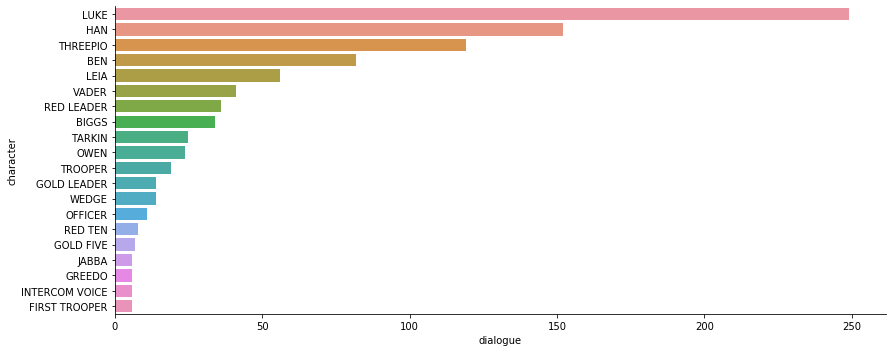

In [9]:
sns.catplot(data=e4.head(20).reset_index(),y = "character",x='dialogue' ,kind='bar',
                       aspect = 2.5, )

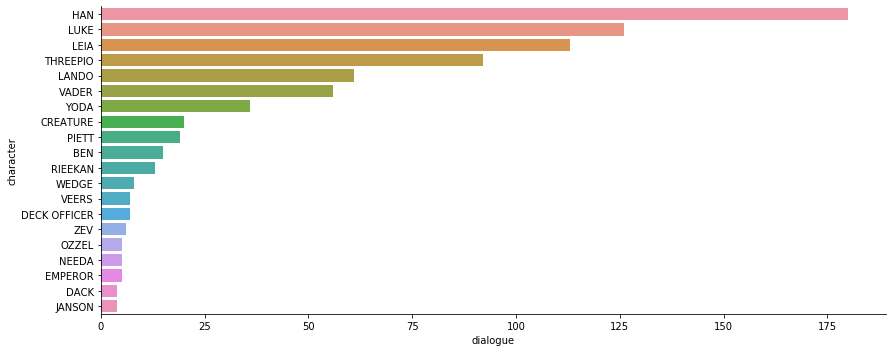

In [10]:
sns.catplot(data=e5.head(20).reset_index(),y = "character",x='dialogue' ,kind='bar',
                       aspect = 2.5, )

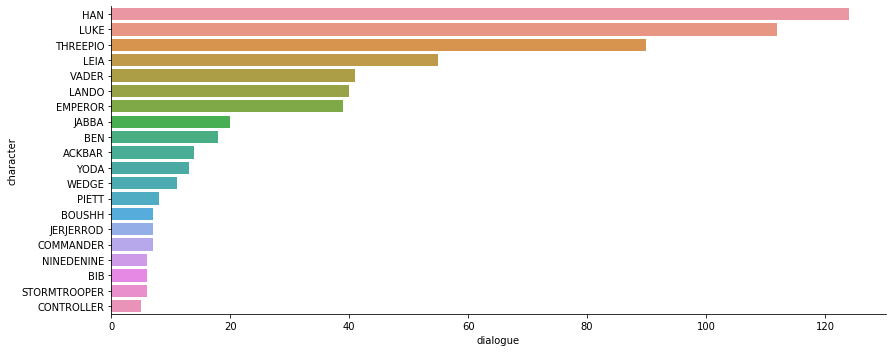

In [11]:
sns.catplot(data=e6.head(20).reset_index(),y = "character",x='dialogue' ,kind='bar',
                       aspect = 2.5, )

# Task#03

In [12]:
ep4["episode"]='ep4'
ep5["episode"]='ep5'
ep6["episode"]='ep6'

In [13]:
allep=pd.concat([ep4, ep5,ep6], ignore_index=True)

In [14]:
allep.head()

,character,dialogue,episode
0,THREEPIO,Did you hear that? They've shut down the main...,ep4
1,THREEPIO,We're doomed!,ep4
2,THREEPIO,There'll be no escape for the Princess this time.,ep4
3,THREEPIO,What's that?,ep4
4,THREEPIO,I should have known better than to trust the l...,ep4


# Task#04

In [15]:
freq= pd.Series((' '.join(allep['dialogue']).split())).tolist() 
mostfreq=FreqDist(freq)
mostfreq

FreqDist({'the': 793, 'I': 664, 'to': 636, 'you': 562, 'a': 415, 'of': 342, 'your': 242, 'is': 239, 'be': 229, 'have': 199, ...})

# Task#05

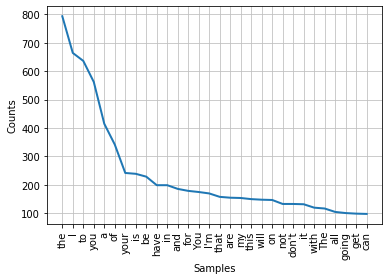

In [16]:
mostfreq.plot(30,cumulative=False)

# Task#06

In [17]:
allep["new_script"] = allep['dialogue'].apply(lambda x:''.join([i for i in x if i not in string.punctuation]))
allep['new_script']=allep['new_script'].str.lower()
allep['new_script']=allep['new_script'].apply(word_tokenize)
stop = stopwords.words('english')
allep['new_script']=allep['new_script'].apply(lambda x: [item for item in x if item not in stop])

In [18]:
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in text]

In [19]:
allep['new_script'] = allep.new_script.apply(lemmatize_text)

In [20]:
allep['new_script']=[" ".join(review) for review in allep['new_script'].values]

In [21]:
allep.head()

,character,dialogue,episode,new_script
0,THREEPIO,Did you hear that? They've shut down the main...,ep4,hear theyve shut main reactor well destroyed s...
1,THREEPIO,We're doomed!,ep4,doomed
2,THREEPIO,There'll be no escape for the Princess this time.,ep4,therell escape princess time
3,THREEPIO,What's that?,ep4,whats
4,THREEPIO,I should have known better than to trust the l...,ep4,known better trust logic halfsized thermocapsu...


# Task#07

In [22]:
mostf=FreqDist(allep['new_script'])
mostf

FreqDist({'': 52, 'yes sir': 11, 'come': 11, 'yes lord': 8, 'oh': 7, 'yes': 7, 'right': 7, 'yeah': 6, 'luke': 6, 'chewie': 6, ...})

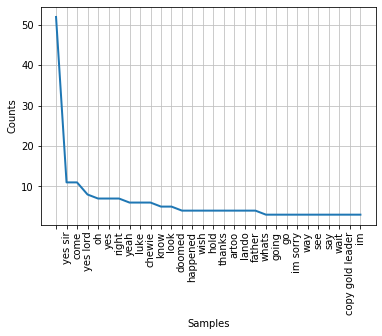

In [23]:
mostf.plot(30,cumulative=False)

# Task#08

In [24]:
yoda=allep.loc[allep["character"] == "YODA", "new_script"].tolist()
Darth =allep.loc[allep["character"] == "DACK", "new_script"].tolist()
Vader=allep.loc[allep["character"] == "VADER", "new_script"].tolist()

In [25]:
Darth

['feeling right sir',
 'right feel could take whole empire',
 'luke approach vector im set',
 'luke weve got malfunction fire control ill cut auxiliary']

In [26]:
bgy=np.array(Image.open("wordcloud_masks/yoda.png"))

In [27]:
bgd=np.array(Image.open("wordcloud_masks/rebelalliance.png"))
bgv=np.array(Image.open("wordcloud_masks/vader.jpg"))

In [28]:
wcy=WordCloud(mask=bgy,max_words=200)
wcd=WordCloud(mask=bgd,max_words=200)
wcv=WordCloud(mask=bgv,max_words=200)

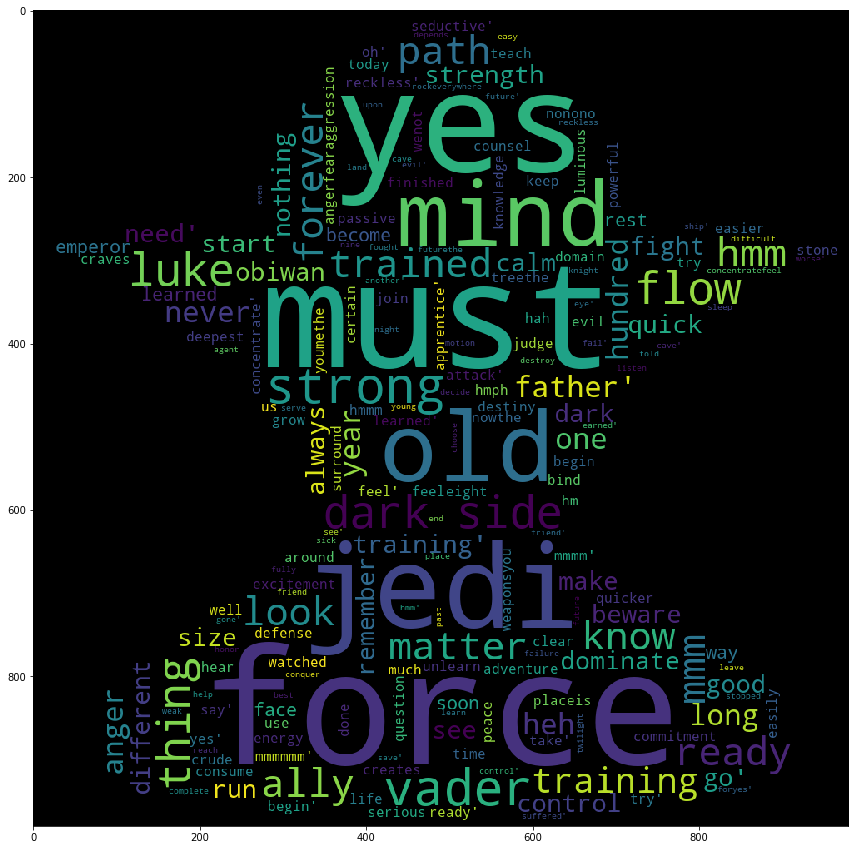

In [29]:
wcy.generate(str(yoda))
plt.figure(figsize=(20,15))
plt.imshow(wcy)

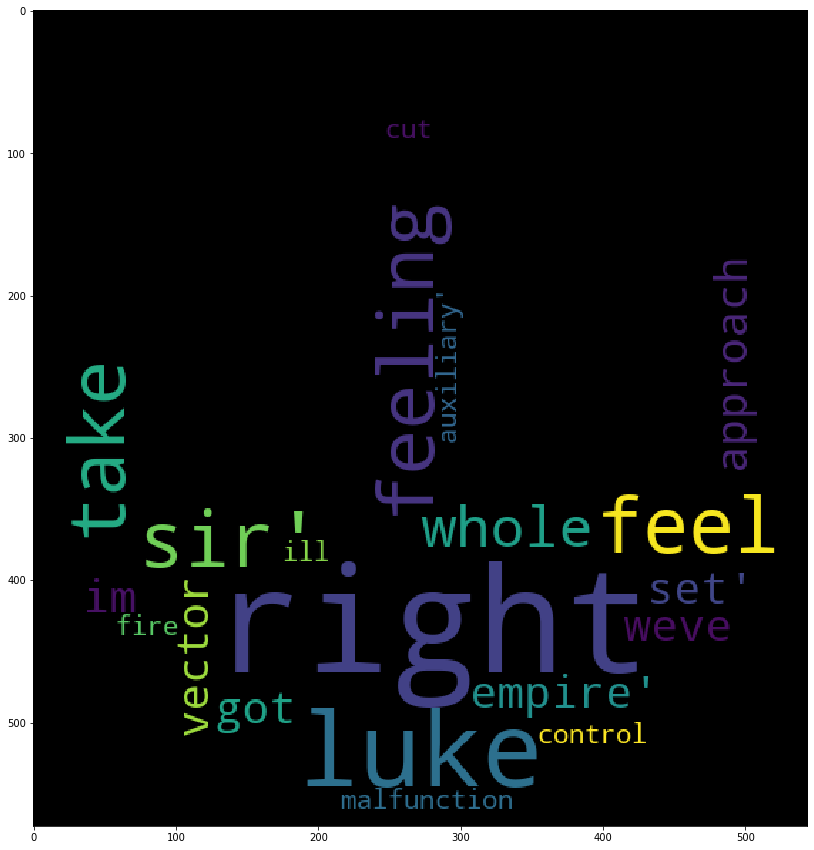

In [30]:
wcd.generate(str(Darth))
plt.figure(figsize=(20,15))
plt.imshow(wcd)

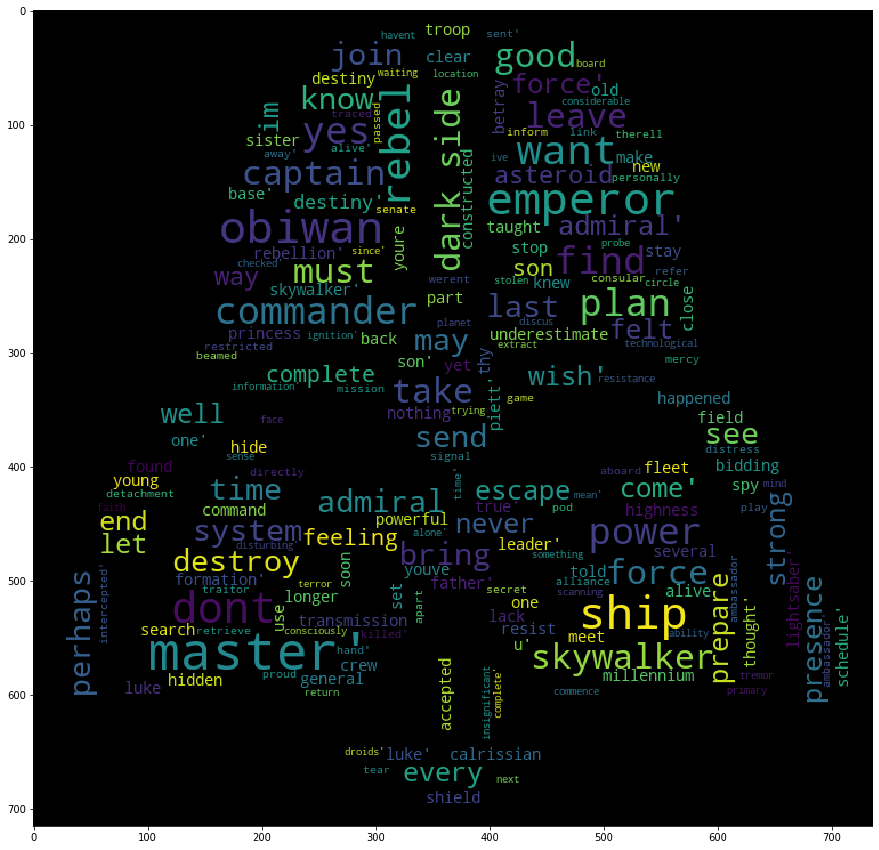

In [31]:
wcv.generate(str(Vader))
plt.figure(figsize=(20,15))
plt.imshow(wcv)

# Task#09

In [32]:
def get_impwords(corpus, n=None):
  
    vec = TfidfVectorizer().fit(corpus)
    tfide = vec.transform(corpus)
    sum_words = tfide.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=False)
    return words_freq[:n]

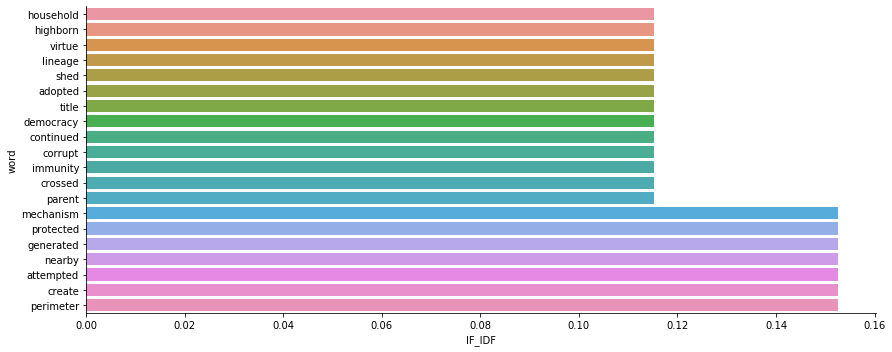

In [33]:
imp_word = get_impwords(allep['new_script'], 20)
imp=dict(imp_word)
im=pd.DataFrame(imp.items(), columns=['word', 'IF_IDF'])

sns.catplot(data=im,y = "word",x='IF_IDF' ,kind='bar',
                       aspect = 2.5, )

In [34]:

def get_top_n_words(corpus, n=None):
   
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

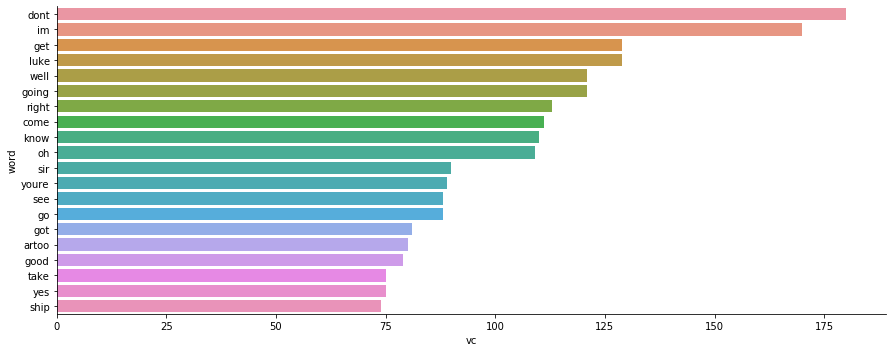

In [35]:
common_words = get_top_n_words(allep['new_script'], 20)
d=dict(common_words)
cm=pd.DataFrame(d.items(), columns=['word', 'vc'])
sns.catplot(data=cm,y = "word",x='vc' ,kind='bar',
                       aspect = 2.5, )

# Task#10

In [36]:
def fetch_sentiment_using_textblob(text):
    sentiment = []
    for i in text: 
        analysis = TextBlob(i)
        # set sentiment 
        if analysis.sentiment.polarity >= 0:
            sentiment.append('positive')
        else: 
            sentiment.append('negative')
    print(len(sentiment))
    return sentiment

In [37]:
tweet_list = allep['new_script'].tolist()
allep['sentiment']= fetch_sentiment_using_textblob(tweet_list)

2523


In [38]:
allep.head()

,character,dialogue,episode,new_script,sentiment
0,THREEPIO,Did you hear that? They've shut down the main...,ep4,hear theyve shut main reactor well destroyed s...,positive
1,THREEPIO,We're doomed!,ep4,doomed,positive
2,THREEPIO,There'll be no escape for the Princess this time.,ep4,therell escape princess time,positive
3,THREEPIO,What's that?,ep4,whats,positive
4,THREEPIO,I should have known better than to trust the l...,ep4,known better trust logic halfsized thermocapsu...,positive


In [39]:
pos=allep.loc[(allep["sentiment"] == "positive"),"character"].value_counts()

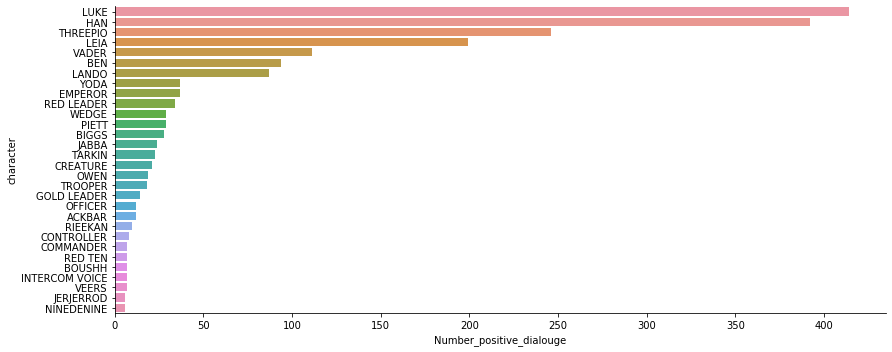

In [40]:
pos=dict(pos)
po=pd.DataFrame(pos.items(), columns=['character', 'Number_positive_dialouge'])
sns.catplot(data=po.head(30),y = "character",x='Number_positive_dialouge' ,kind='bar',aspect = 2.5, )

In [41]:
neg=allep.loc[(allep["sentiment"] == "negative"),"character" ].value_counts()

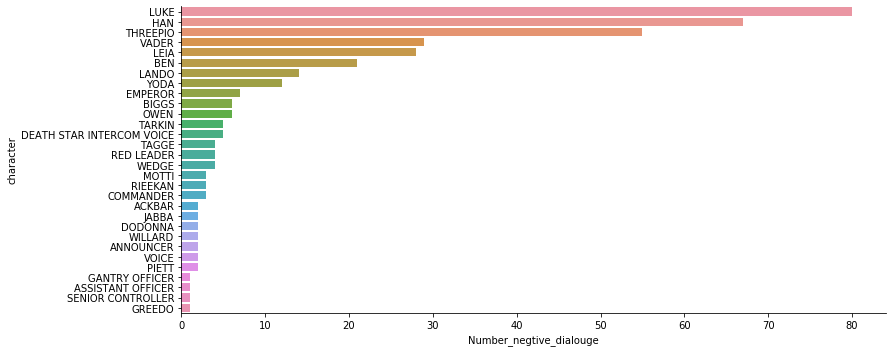

In [42]:

neg=dict(neg)
ne=pd.DataFrame(neg.items(), columns=['character', 'Number_negtive_dialouge'])
sns.catplot(data=ne.head(30),y = "character",x='Number_negtive_dialouge' ,kind='bar',aspect = 2.5, )



In [43]:
#no of negtive and possitive in each epi
allep.loc[(allep["sentiment"] == "negative") &(allep["episode"]=="ep4")].count()

character     174
dialogue      174
episode       174
new_script    174
sentiment     174
dtype: int64

In [44]:
allep.loc[(allep["sentiment"] == "positive") &(allep["episode"]=="ep4")].count()

character     836
dialogue      836
episode       836
new_script    836
sentiment     836
dtype: int64

In [45]:
allep.loc[(allep["sentiment"] == "negative") &(allep["episode"]=="ep5")].count()

character     137
dialogue      137
episode       137
new_script    137
sentiment     137
dtype: int64

In [46]:
allep.loc[(allep["sentiment"] == "positive") &(allep["episode"]=="ep5")].count()

character     702
dialogue      702
episode       702
new_script    702
sentiment     702
dtype: int64

In [47]:
allep.loc[(allep["sentiment"] == "negative") &(allep["episode"]=="ep6")].count()

character     86
dialogue      86
episode       86
new_script    86
sentiment     86
dtype: int64

In [48]:
allep.loc[(allep["sentiment"] == "positive") &(allep["episode"]=="ep6")].count()

character     588
dialogue      588
episode       588
new_script    588
sentiment     588
dtype: int64